## Lesson 7: Encoder-Decoder LSTM Multi-step Forecasting
* Expected shape `[samples, timesteps, features]`

In [1]:
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed

# Modified version of sliding window from lesson 2
def sliding_window(li, step, step2):
    import numpy as np
    idx = [(i, i+step) for i in range(0, len(li)-step, step2)]
    X = []
    y = []
    for i, j in idx:
        X.append(li[i:j-step2])
        y.append(li[j-step2:j])
    return np.array(X), np.array(y)

# read data
df = pd.read_csv('data/daily-total-female-births.csv')
s = df.sort_values('Date')['Births'].values

window_size = 9
label_window_size = 2
epochs = 100

# sliding window
X, y = sliding_window(s, window_size, label_window_size)
X = X.reshape(X.shape[0], X.shape[1], 1)
y = y.reshape(y.shape[0], y.shape[1], 1)

# split into train, test
sep = int(len(X) * 1/2)
train_X, train_y = X[:sep], y[:sep]
test_X, test_y = X[sep:], y[sep:]

/Users/dyeoh/miniconda3/envs/lab_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/dyeoh/miniconda3/envs/lab_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/dyeoh/miniconda3/envs/lab_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/dyeoh/miniconda3/envs/lab_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/dyeoh/miniconda3/envs/lab_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
 

In [2]:
# define model
model = Sequential()
model.add(LSTM(10, activation='relu', input_shape=(window_size-label_window_size, 1)))
model.add(RepeatVector(2))
model.add(LSTM(10, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(train_X, train_y, epochs=200, verbose=0)

# demonstrate prediction
pred_y = model.predict(test_X)
pred_y = pred_y.ravel()
test_y = test_y.ravel()
mean_squared_error(test_y, pred_y)

60.91589023664238

In [3]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

### Predict Test Data
* Can be seen in the plot that the model is able to predict the trend of total female births

MSE: 60.91589023664238


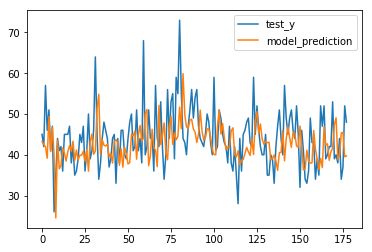

In [4]:
# demonstrate prediction
pred_y = model.predict(test_X)
pred_y = pred_y.ravel()
test_y = test_y.ravel()
print('MSE:', mean_squared_error(test_y, pred_y))

# plot test_y, pred_y
plt.plot(test_y.reshape(-1,1))
plt.plot(pred_y)
plt.legend(['test_y', 'model_prediction'])
plt.show()

### Fit whole data
* This is plot on predicting the whole dataset (training + testing)
* The model is able to predict the data

MSE: 56.05495748296658


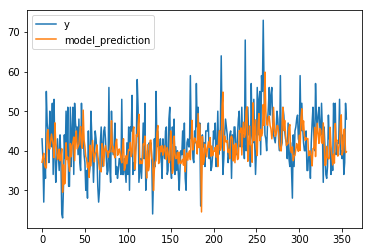

In [5]:
# demonstrate prediction
pred_y = model.predict(X)
pred_y = pred_y.ravel()
temp_y = y.ravel()
print('MSE:', mean_squared_error(temp_y, pred_y))

# plot test_y, pred_y
plt.plot(y.reshape(-1,1))
plt.plot(pred_y)
plt.legend(['y', 'model_prediction'])
plt.show()
